## Assignment explanation

- **Data extraction**: First I needed to download the data from Azure blob storage. For that purpose, I used requests library. I stored dataframes and sas tokens in variables. For plan_data I used plan_df and for post_buy data I used postbuy_df.
- **Data exploration**: Then I explored the data in postbuy_df, check the NaN values, unique values, and missing values.
- **Data cleaning**: After data exploration, I started to drop the columns. First I needed to remove columns, that have either no use like TagCodes column, or contain too much missing data (Source). Also, I wanted to rid of the data, that have no additional filtering value as they all contained only a single value. I also wanted to remove rows with missing data if there was not much data missing.
-  **Downloading cleaned data**: I stored cleaned data in csv format.
-  **Budget calculation**: The first task was to calculate how much of the budget was spent. 
-  **Performing visualisations**: Using my cleaned dataframe I started to visualise the dataframes. The first visualisation task was to represent the planned budget and realised investments by day. The second task was to represent these values cumulatively and the last task was to calculate ratio between the cumulative planned budget and cumulative realised investments to the last data from postbuy_df
- **Suggestion**: In the last section I tried to suggest other metrics to calculate and visualise interesting data.


In [167]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data extraction

In [168]:
sas_token = "sv=2022-11-02&ss=bfqt&srt=co&sp=r&se=2024-09-08T21:42:10Z&st=2024-07-08T13:42:10Z&spr=https&sig=GPNpEjOEf0bdd5l3en38h6zjhBgNFNsaoalVbKj7k%2FU%3D"
base_url = "https://detask.blob.core.windows.net/de-task/"

plan_data = f"{base_url}1AHA810_plan.csv?{sas_token}"
postbuy_data = f"{base_url}1AHA810_postbuy.csv?{sas_token}"

In [169]:
def download_csv(url,file):
    response = requests.get(url)
    if response.status_code == 200:
        with open(file, 'wb') as file:
            file.write(response.content)
        print("Download done")
    else:
        print(f"Download failed. Status code: {response.status_code}")
download_csv(plan_data, "data/plan_data.csv")
download_csv(postbuy_data, "data/postbuy_data.csv")       

Download done
Download done


### Data reading

In [170]:
plan_df = pd.read_csv("data/plan_data.csv")
postbuy_df = pd.read_csv("data/postbuy_data.csv")

In [171]:
plan_df.head()

,Date,Job Number,Start,End,Impressions_DailyGoal,Impressions_Client,Clicks_DailyGoal,Clicks_Client,Views_DailyGoal,Views_Client,Other_DailyGoal,Other_Client
0,2018-10-04,1AHA810,01/01/2018,31/12/2018,495268.4,20172.539051,364.5714,22140.639861,0,0,0,0
1,2018-09-11,1AHA810,01/01/2018,31/12/2018,490266.7,19958.414686,317.1429,19260.278600,0,0,0,0
2,2018-11-19,1AHA810,01/01/2018,31/12/2018,393864.1,14051.593576,328.1429,19928.315199,0,0,0,0
3,2018-10-27,1AHA810,01/01/2018,31/12/2018,441062.8,22135.974586,364.5714,22140.639861,0,0,0,0
4,2018-12-12,1AHA810,01/01/2018,31/12/2018,370985.6,15978.972456,136.0000,8259.361599,0,0,0,0


In [172]:
postbuy_df

,Unnamed: 0,Id,Account,BusinessUnit,Date,ReportGranularity,SalesChannel,PlatformId,PlatformCode,ChannelId,...,Conversions,Deliveries,NetRevenue,GrossProfit,CurrencyCode,AppliedAttributionModel,PeriodStartDate,EtlLoader,CreatedAt,ModifiedAt
0,0,11E323D9-A905-4D55-A2B5-573A180E5A62,ahato,ahatocz,11/09/2018,daily,online,49_adwords,AdWords,49_ppcadwordsnonbrand,...,2.0,2.0,0.0,0.0,CZK,lastTouch,2018-09-11 00:00:00.000000,DataFactory,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
1,1,410DE7BA-3F6C-4570-A9B2-A6224EDE6AB4,ahato,ahatocz,11/09/2018,daily,online,49_adwords,AdWords,49_ppcadwordsnonbrand,...,4.0,4.0,0.0,0.0,CZK,lastTouch,2018-09-11 00:00:00.000000,DataFactory,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
2,2,4A95CFBF-7DFB-4D07-B0D6-248EC3BA5008,ahato,ahatocz,11/09/2018,daily,online,49_adwords,AdWords,49_ppcadwordsremarketing,...,4.0,4.0,0.0,0.0,CZK,lastTouch,2018-09-11 00:00:00.000000,DataFactory,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
3,3,4A7D538A-D916-4393-809E-746430C525C5,ahato,ahatocz,03/10/2018,daily,online,49_sklik,Sklik,49_ppcsklikbrand,...,2.0,2.0,0.0,0.0,CZK,lastTouch,2018-10-03 00:00:00.000000,DataFactory,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
4,4,CCCA47E2-692B-4122-870D-D917142F2DCE,ahato,ahatocz,03/10/2018,daily,online,49_sklik,Sklik,49_ppcsklikbrand,...,4.0,4.0,0.0,0.0,CZK,lastTouch,2018-10-03 00:00:00.000000,DataFactory,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,15048,19A921BA-8BAA-4543-8724-9CD0C9B776F8,ahato,ahatocz,17/08/2018,daily,online,49_sklik,Sklik,49_ppcsklikbrand,...,5.0,5.0,0.0,0.0,CZK,lastTouch,2018-08-17 00:00:00.000000,DataFactory,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15049,15049,E8D19533-7677-48A6-8868-C472FBB55674,ahato,ahatocz,17/08/2018,daily,online,49_sklik,Sklik,49_ppcsklikbrand,...,2.0,2.0,0.0,0.0,CZK,lastTouch,2018-08-17 00:00:00.000000,DataFactory,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15050,15050,7845EA96-05CF-4FAC-8D33-E5D08DD2EADD,ahato,ahatocz,17/08/2018,daily,online,49_sklik,Sklik,49_ppcskliknonbrand,...,0.0,0.0,0.0,0.0,CZK,lastTouch,2018-08-17 00:00:00.000000,DataFactory,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15051,15051,89A0DD4C-80CF-4732-B0DE-CAFC3D411FDE,ahato,ahatocz,17/08/2018,daily,online,49_sklik,Sklik,49_ppcskliknonbrand,...,3.0,3.0,0.0,0.0,CZK,lastTouch,2018-08-17 00:00:00.000000,DataFactory,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666


## Data cleaning - postbuy

In [173]:
postbuy_df.shape

(15053, 38)

In [174]:
postbuy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15053 entries, 0 to 15052
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               15053 non-null  int64  
 1   Id                       15053 non-null  object 
 2   Account                  15053 non-null  object 
 3   BusinessUnit             15053 non-null  object 
 4   Date                     15053 non-null  object 
 5   ReportGranularity        15053 non-null  object 
 6   SalesChannel             15053 non-null  object 
 7   PlatformId               15053 non-null  object 
 8   PlatformCode             15053 non-null  object 
 9   ChannelId                15053 non-null  object 
 10  ChannelCode              15053 non-null  object 
 11  TagCodes                 0 non-null      float64
 12  Site                     15053 non-null  object 
 13  AdSource                 15053 non-null  object 
 14  AdMedium              

In [175]:
def print_value_counts(df):
    for column in df.columns:
        print(f"Value counts for column '{column}':")
        print(df[column].value_counts())
        print("\n")

In [176]:
for column in postbuy_df.columns:
    pct_missing = np.mean(postbuy_df[column].isnull()) *100
    print('{} - {}%'.format(column, pct_missing))

Unnamed: 0 - 0.0%
Id - 0.0%
Account - 0.0%
BusinessUnit - 0.0%
Date - 0.0%
ReportGranularity - 0.0%
SalesChannel - 0.0%
PlatformId - 0.0%
PlatformCode - 0.0%
ChannelId - 0.0%
ChannelCode - 0.0%
TagCodes - 100.0%
Site - 0.0%
AdSource - 0.0%
AdMedium - 0.0%
AdCampaign - 0.0%
JobNumber - 0.0%
LineItem - 0.0%
Source - 53.94273566730884%
Format - 0.23251179166943464%
Target - 0.23251179166943464%
Other1 - 0.23251179166943464%
Other2 - 19.28519232046768%
MarketingInvestment - 0.06643194047698132%
Views - 0.06643194047698132%
Impressions - 0.06643194047698132%
Clicks - 0.06643194047698132%
Visits - 0.0%
Conversions - 0.0%
Deliveries - 0.0%
NetRevenue - 0.0%
GrossProfit - 0.0%
CurrencyCode - 0.0%
AppliedAttributionModel - 0.0%
PeriodStartDate - 0.0%
EtlLoader - 0.0%
CreatedAt - 0.0%
ModifiedAt - 0.0%


In [177]:
print_value_counts(postbuy_df)

Value counts for column 'Unnamed: 0':
Unnamed: 0
0        1
10040    1
10028    1
10029    1
10030    1
        ..
5022     1
5023     1
5024     1
5025     1
15052    1
Name: count, Length: 15053, dtype: int64


Value counts for column 'Id':
Id
11E323D9-A905-4D55-A2B5-573A180E5A62    1
4E0C048F-0C0C-4DA3-ADF6-768748F82AE3    1
6AD6D72D-28D2-4411-8B9E-8B52B7B5D885    1
F1260621-015F-4E0D-A8BD-1AA4EF77BFBF    1
F857B935-8794-488D-99ED-40A6B41CC16D    1
                                       ..
90E06DA8-381F-4C03-87A6-5A3AD709246F    1
ACE52BA3-595B-49C8-BE1B-20EB047E682D    1
0B00B554-DD6F-4B6D-93AE-D8A0F8771E17    1
A93079DF-1327-4608-9B44-916124645EAC    1
9F78F8FC-6D53-475C-888F-F5183E915BDC    1
Name: count, Length: 15053, dtype: int64


Value counts for column 'Account':
Account
ahato    15053
Name: count, dtype: int64


Value counts for column 'BusinessUnit':
BusinessUnit
ahatocz    15053
Name: count, dtype: int64


Value counts for column 'Date':
Date
28/06/2018    92
15/01/2018 

In [178]:
postbuy_df['Views'].value_counts()

Views
0.0    15043
Name: count, dtype: int64

In [179]:
postbuy_df = postbuy_df.drop(columns=['Account','BusinessUnit','ReportGranularity','SalesChannel','TagCodes', 'PlatformId', 'EtlLoader', 'AppliedAttributionModel','ChannelId', 'JobNumber', 'CurrencyCode', 'AdMedium', 'AdSource', 'Other2', 'Source', 'Format'])

In [180]:
postbuy_df = postbuy_df.drop(postbuy_df.columns[0], axis=1)

In [181]:
postbuy_df

,Id,Date,PlatformCode,ChannelCode,Site,AdCampaign,LineItem,Target,Other1,MarketingInvestment,...,Impressions,Clicks,Visits,Conversions,Deliveries,NetRevenue,GrossProfit,PeriodStartDate,CreatedAt,ModifiedAt
0,11E323D9-A905-4D55-A2B5-573A180E5A62,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~cpa~mobil,60,src,nonbrand,2027.60,...,346.0,31.0,36,2.0,2.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
1,410DE7BA-3F6C-4570-A9B2-A6224EDE6AB4,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~konkurence,60,src,nonbrand,1325.87,...,1840.0,47.0,44,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
2,4A95CFBF-7DFB-4D07-B0D6-248EC3BA5008,11/09/2018,AdWords,ppcadwordsremarketing,ahato.cz,1AHA810|60|bnr|rmk|vyprodej,60,rmk,vyprodej,1549.98,...,16018.0,57.0,56,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
3,4A7D538A-D916-4393-809E-746430C525C5,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,185.80,...,231.0,31.0,33,2.0,2.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
4,CCCA47E2-692B-4122-870D-D917142F2DCE,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,58.90,...,107.0,38.0,54,4.0,4.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,19A921BA-8BAA-4543-8724-9CD0C9B776F8,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,38.60,...,101.0,20.0,26,5.0,5.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15049,E8D19533-7677-48A6-8868-C472FBB55674,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,23.40,...,91.0,30.0,39,2.0,2.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15050,7845EA96-05CF-4FAC-8D33-E5D08DD2EADD,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~frazova,60,src,nonbrand,0.00,...,20.0,0.0,0,0.0,0.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15051,89A0DD4C-80CF-4732-B0DE-CAFC3D411FDE,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~presna,60,src,nonbrand,1182.50,...,294.0,9.0,9,3.0,3.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666


In [182]:
for column in postbuy_df.columns:
    pct_missing = np.mean(postbuy_df[column].isnull()) *100
    print('{} - {}%'.format(column, pct_missing))

Id - 0.0%
Date - 0.0%
PlatformCode - 0.0%
ChannelCode - 0.0%
Site - 0.0%
AdCampaign - 0.0%
LineItem - 0.0%
Target - 0.23251179166943464%
Other1 - 0.23251179166943464%
MarketingInvestment - 0.06643194047698132%
Views - 0.06643194047698132%
Impressions - 0.06643194047698132%
Clicks - 0.06643194047698132%
Visits - 0.0%
Conversions - 0.0%
Deliveries - 0.0%
NetRevenue - 0.0%
GrossProfit - 0.0%
PeriodStartDate - 0.0%
CreatedAt - 0.0%
ModifiedAt - 0.0%


In [183]:
df_cleaned = postbuy_df.dropna()

In [184]:
df_cleaned

,Id,Date,PlatformCode,ChannelCode,Site,AdCampaign,LineItem,Target,Other1,MarketingInvestment,...,Impressions,Clicks,Visits,Conversions,Deliveries,NetRevenue,GrossProfit,PeriodStartDate,CreatedAt,ModifiedAt
0,11E323D9-A905-4D55-A2B5-573A180E5A62,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~cpa~mobil,60,src,nonbrand,2027.60,...,346.0,31.0,36,2.0,2.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
1,410DE7BA-3F6C-4570-A9B2-A6224EDE6AB4,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~konkurence,60,src,nonbrand,1325.87,...,1840.0,47.0,44,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
2,4A95CFBF-7DFB-4D07-B0D6-248EC3BA5008,11/09/2018,AdWords,ppcadwordsremarketing,ahato.cz,1AHA810|60|bnr|rmk|vyprodej,60,rmk,vyprodej,1549.98,...,16018.0,57.0,56,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
3,4A7D538A-D916-4393-809E-746430C525C5,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,185.80,...,231.0,31.0,33,2.0,2.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
4,CCCA47E2-692B-4122-870D-D917142F2DCE,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,58.90,...,107.0,38.0,54,4.0,4.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,19A921BA-8BAA-4543-8724-9CD0C9B776F8,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,38.60,...,101.0,20.0,26,5.0,5.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15049,E8D19533-7677-48A6-8868-C472FBB55674,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,23.40,...,91.0,30.0,39,2.0,2.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15050,7845EA96-05CF-4FAC-8D33-E5D08DD2EADD,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~frazova,60,src,nonbrand,0.00,...,20.0,0.0,0,0.0,0.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15051,89A0DD4C-80CF-4732-B0DE-CAFC3D411FDE,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~presna,60,src,nonbrand,1182.50,...,294.0,9.0,9,3.0,3.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666


In [185]:
postbuy_df.dropna(inplace=True)

In [186]:
postbuy_df

,Id,Date,PlatformCode,ChannelCode,Site,AdCampaign,LineItem,Target,Other1,MarketingInvestment,...,Impressions,Clicks,Visits,Conversions,Deliveries,NetRevenue,GrossProfit,PeriodStartDate,CreatedAt,ModifiedAt
0,11E323D9-A905-4D55-A2B5-573A180E5A62,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~cpa~mobil,60,src,nonbrand,2027.60,...,346.0,31.0,36,2.0,2.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
1,410DE7BA-3F6C-4570-A9B2-A6224EDE6AB4,11/09/2018,AdWords,ppcadwordsnonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~konkurence,60,src,nonbrand,1325.87,...,1840.0,47.0,44,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
2,4A95CFBF-7DFB-4D07-B0D6-248EC3BA5008,11/09/2018,AdWords,ppcadwordsremarketing,ahato.cz,1AHA810|60|bnr|rmk|vyprodej,60,rmk,vyprodej,1549.98,...,16018.0,57.0,56,4.0,4.0,0.0,0.0,2018-09-11 00:00:00.000000,2018-10-26 14:12:33.396666,2018-10-26 14:12:33.396666
3,4A7D538A-D916-4393-809E-746430C525C5,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,185.80,...,231.0,31.0,33,2.0,2.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
4,CCCA47E2-692B-4122-870D-D917142F2DCE,03/10/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,58.90,...,107.0,38.0,54,4.0,4.0,0.0,0.0,2018-10-03 00:00:00.000000,2018-10-30 06:13:41.006666,2018-10-30 06:13:41.006666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15048,19A921BA-8BAA-4543-8724-9CD0C9B776F8,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~desktop,60,src,brand,38.60,...,101.0,20.0,26,5.0,5.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15049,E8D19533-7677-48A6-8868-C472FBB55674,17/08/2018,Sklik,ppcsklikbrand,ahato.cz,1AHA810|60|txt|src|brand~mobil,60,src,brand,23.40,...,91.0,30.0,39,2.0,2.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15050,7845EA96-05CF-4FAC-8D33-E5D08DD2EADD,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~frazova,60,src,nonbrand,0.00,...,20.0,0.0,0,0.0,0.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666
15051,89A0DD4C-80CF-4732-B0DE-CAFC3D411FDE,17/08/2018,Sklik,ppcskliknonbrand,ahato.cz,1AHA810|60|txt|src|nonbrand~desktop~presna,60,src,nonbrand,1182.50,...,294.0,9.0,9,3.0,3.0,0.0,0.0,2018-08-17 00:00:00.000000,2018-10-23 13:33:06.226666,2018-10-23 13:33:06.226666


In [219]:
postbuy_df.to_csv('cleaned_data.csv',index=False)

## Count % total budget gone

In [187]:
plan_df

,Date,Job Number,Start,End,Impressions_DailyGoal,Impressions_Client,Clicks_DailyGoal,Clicks_Client,Views_DailyGoal,Views_Client,Other_DailyGoal,Other_Client
0,2018-10-04,1AHA810,01/01/2018,31/12/2018,495268.4,20172.539051,364.5714,22140.639861,0,0,0,0
1,2018-09-11,1AHA810,01/01/2018,31/12/2018,490266.7,19958.414686,317.1429,19260.278600,0,0,0,0
2,2018-11-19,1AHA810,01/01/2018,31/12/2018,393864.1,14051.593576,328.1429,19928.315199,0,0,0,0
3,2018-10-27,1AHA810,01/01/2018,31/12/2018,441062.8,22135.974586,364.5714,22140.639861,0,0,0,0
4,2018-12-12,1AHA810,01/01/2018,31/12/2018,370985.6,15978.972456,136.0000,8259.361599,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2018-06-25,1AHA810,01/01/2018,31/12/2018,470422.2,18010.721791,228.7543,13892.385889,0,0,0,0
360,2018-02-02,1AHA810,01/01/2018,31/12/2018,637938.4,20416.772871,315.0000,19130.138997,0,0,0,0
361,2018-10-09,1AHA810,01/01/2018,31/12/2018,441062.8,22135.974586,364.5714,22140.639861,0,0,0,0
362,2018-07-01,1AHA810,01/01/2018,31/12/2018,470422.2,18010.721791,228.7543,13892.385889,0,0,0,0


In [188]:
budget_cols = ['Impressions_Client', 'Clicks_Client', 'Views_Client', 'Other_Client']
budget = {col: plan_df[col].sum() for col in budget_cols}
total_budget = sum(budget.values())


for col, col_sum in budget.items():
    print(f"Sum of {col}: {col_sum}")

print(f"Total sum of all columns: {total_budgeet}")


Sum of Impressions_Client: 6426515.831089875
Sum of Clicks_Client: 6446280.217037666
Sum of Views_Client: 0
Sum of Other_Client: 0
Total sum of all columns: 12872796.04812754


In [189]:
postbuy_df['Date'] = pd.to_datetime(postbuy_df['Date'], errors='coerce')
highest_date = postbuy_df['Date'].max()
lowest_date = postbuy_df['Date'].min()

print(f"Highest date: {highest_date}")
print(f"Lowest date: {lowest_date}")

Highest date: 2018-12-10 00:00:00
Lowest date: 2018-01-01 00:00:00


In [190]:
total_spend = postbuy_df['MarketingInvestment'].sum()
print(total_spend)

10311546.03


In [191]:
percentage_budget_used = (total_spend / total_budget) * 100
print(f"Percentage of Budget Used: {percentage_budget_used:.2f}%")

Percentage of Budget Used: 80.10%


#### Original budget for year 2018 was total of 12872796.05CZK. To date 2018-12-10 was: percentage of Budget Used: 80.10% as 10311546.03CZK in total

## Graph to compare planed impressions, clicks, views and realised investments by day

In [192]:
plan_df['Date'] = pd.to_datetime(plan_df['Date'])
postbuy_df['Date'] = pd.to_datetime(postbuy_df['Date'])

In [193]:
plan_df['Total_budget'] = plan_df['Impressions_Client'] + plan_df['Clicks_Client'] + plan_df['Views_Client']
plan_df_total_budget = plan_df.groupby('Date')['Total_budget'].sum().reset_index()

In [194]:
postbuy_df_total = postbuy_df.groupby('Date')['MarketingInvestment'].sum().reset_index()

In [195]:
merged_df = pd.merge(plan_df_total_budget, postbuy_df_total, on='Date', how='outer')

In [196]:
merged_df.isna().value_counts()

Date   Total_budget  MarketingInvestment
False  False         True                   244
                     False                  120
Name: count, dtype: int64

In [205]:
merged_df = pd.merge(plan_df_total_budget, postbuy_df_total, on='Date', how='outer').fillna(0)

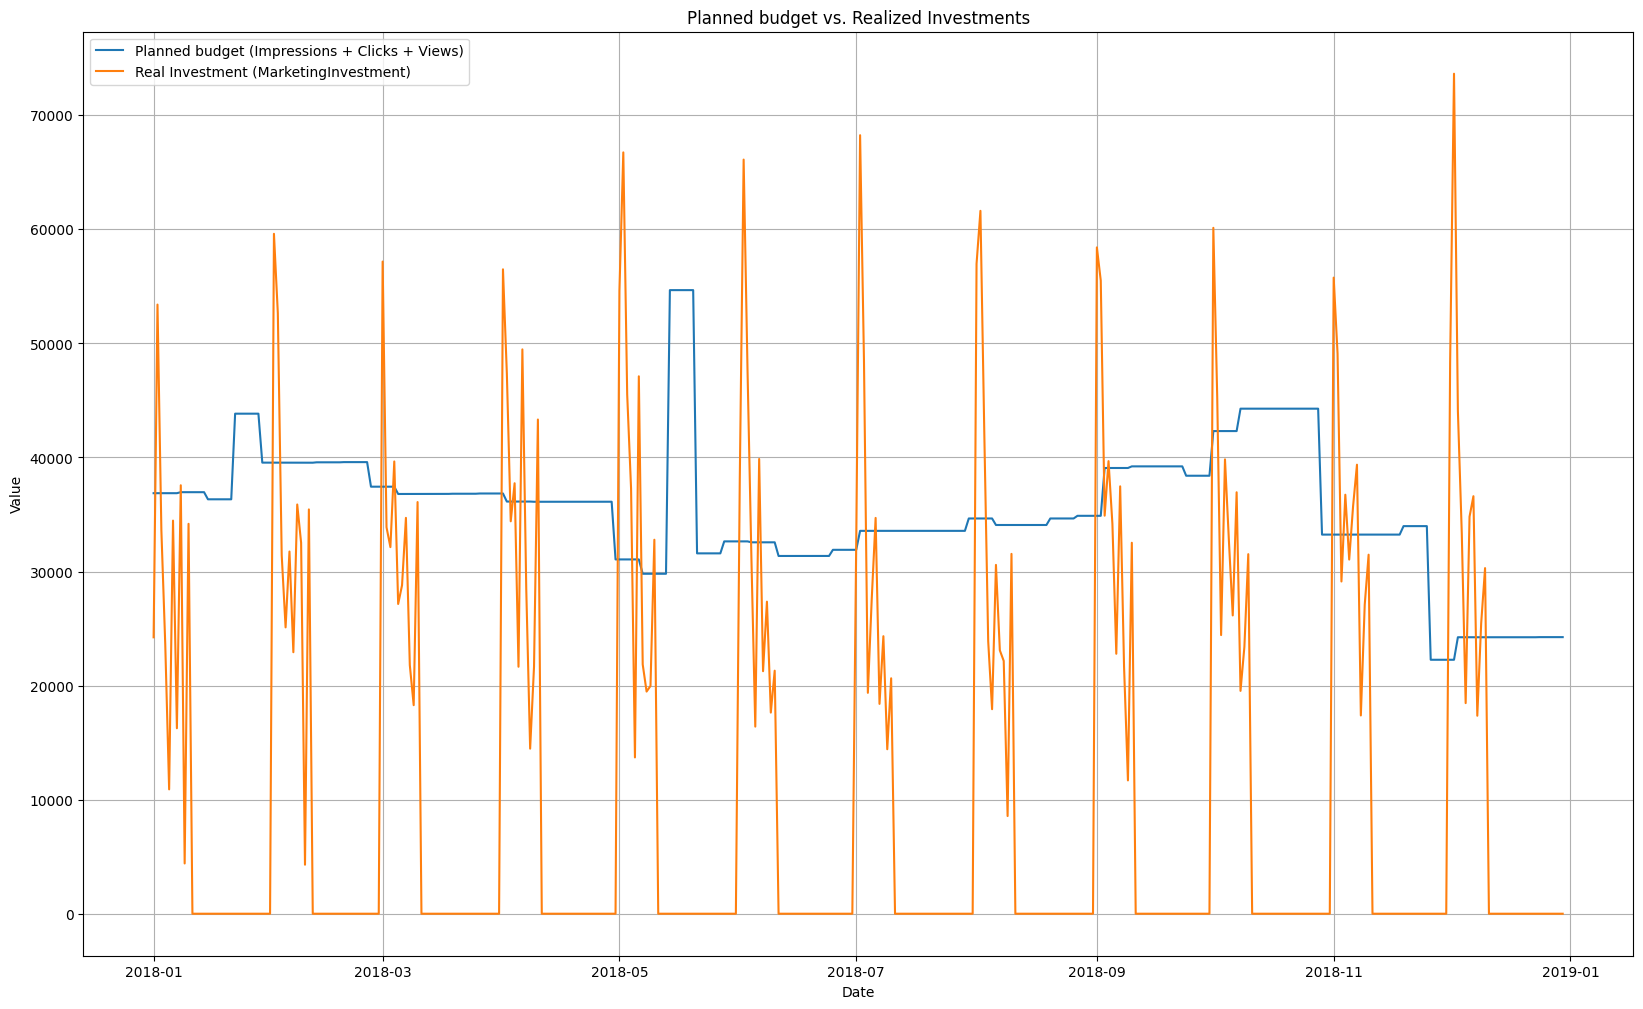

In [207]:
plt.figure(figsize=(20,12))

sns.lineplot(data=merged_df, x='Date', y='Total_budget', label='Planned budget (Impressions + Clicks + Views)')
sns.lineplot(data=merged_df, x='Date', y='MarketingInvestment', label='Real Investment (MarketingInvestment)')


plt.title('Planned budget vs. Realized Investments')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()

#### According the graph, planned budget and real investment is not in allignment. Especially in latter phases, within closing the year, company expected to lower spending, but instead real investment went up.

## Graph to compare cummulative values of real investments and planned budget

In [208]:
merged_df['Cumulative_budget'] = merged_df['Total_budget'].cumsum()
merged_df['Cumulative_real'] = merged_df['MarketingInvestment'].cumsum()

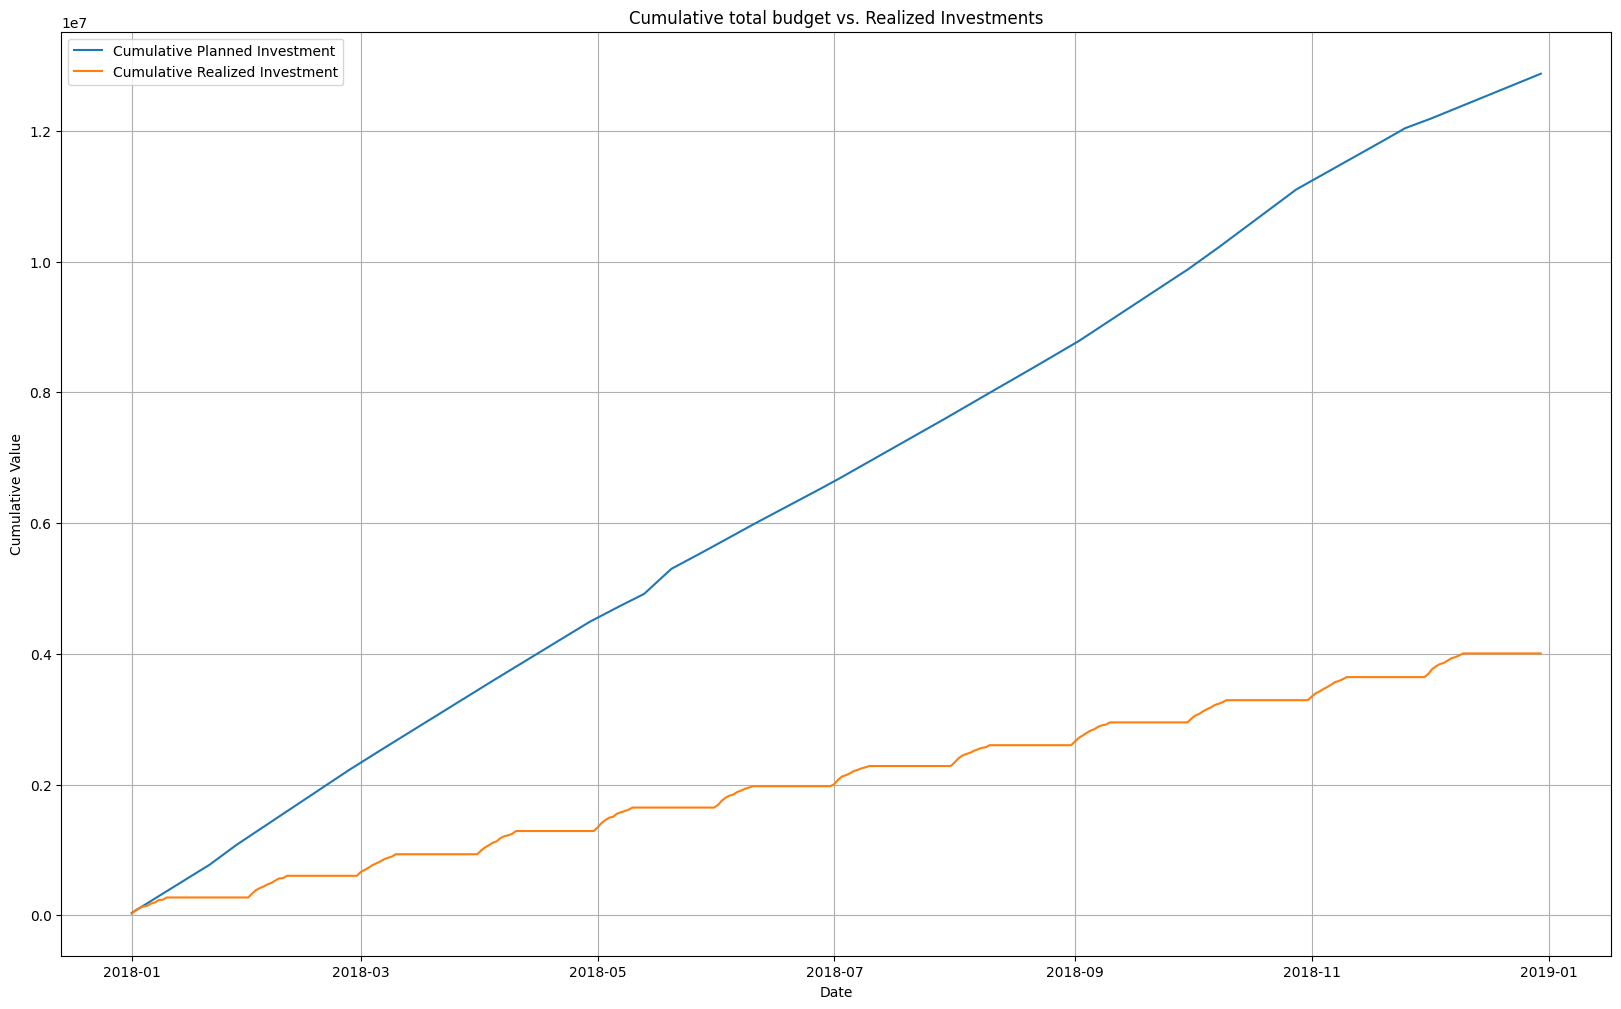

In [209]:
plt.figure(figsize=(20, 12))

sns.lineplot(data=merged_df, x='Date', y='Cumulative_budget', label='Cumulative Planned Investment')
sns.lineplot(data=merged_df, x='Date', y='Cumulative_real', label='Cumulative Realized Investment')

plt.title('Cumulative total budget vs. Realized Investments')
plt.xlabel('Date')
plt.ylabel('Cumulative Value')
plt.legend()
plt.grid(True)

plt.show()

#### According the graph, there is a positive slope, indicating that the trend is preserved. However the real investment are not spend at the same rate as expected cumulative values (however cumulative values contain all three budget investments which in cumulative value are high numbers)

## Ratio between cumulative planned and cumulative postbuy value to latest day

In [211]:
latest_day = postbuy_df['Date'].max()
latest_data = merged_df[merged_df['Date'] <= latest_date]

In [212]:
latest_cumulative_values = latest_data.iloc[-1]
print(latest_cumulative_values)

Date                   2018-12-10 00:00:00
Total_budget                  24238.334055
MarketingInvestment               30299.93
Cumulative_budget          12387960.235243
Cumulative_real                 4005865.71
Name: 343, dtype: object


In [217]:
ratio = latest_cumulative_values['Cumulative_real']/latest_cumulative_values['Cumulative_budget']
print(f"Ratio is {ratio: .2f}")

Ratio is  0.32


In [220]:
merged_df.to_csv('merged_data.csv', index=False)

#### For every planned investment only 32% has been realized in terms of marketing investments. Therefore realized investments is much lower than expected. As the company did not reach planned investment as expected, there might be suggestion to change the marketing strategy or execution.

## Suggestions

1. Personally I would like to visualise grossProfit in comparison with marketing investment, to understand how much profit was generated on money spend. 
2. Comparison between planned goals for impression, clicks, views and other with actual impressions, clicks, visits, conversions